# Simulation 3A

In this simulation we assess the **sensitivity** of two *direct methods* using a parametric variant of the football example with data matrices ($P_1(\eta), P_2(\eta)$).

We consider the two following direct methods:
- Exploitation by rank centrality (RC) and aggregation by weighted average (WA)
- Exploitation by netflow (NF) and aggregation by weighted average (WA)

### Importing Libraries

Importing standard libraries and the following modules:
- *datagenerator.py*: containing data sources;
- *normalizationlib.py*: containing functions to perform normalizations;
- *aggregationlib.py*: containing functions to perform aggregation;
- *exploitationlib.py*: containing functions to perform exploitation.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import datagenerator as data
import normalizationlib as norm
import aggregationlib as agg
import exploitationlib as expl

# Football Example

We consider four team (Tunisia, Malta, Brazil, Argentina). The two experts agree that 
- Tunisia and Malta are weak teams;
- Brazil and Argentina are strong teams;
- Brazil beats Tunisia and Malta moderately, as a function of the parameter $\eta$;
- Argentina beats Tunisia and Malta largely;
- Brazil beats Argentina narrowly.

At each iteration, we will increase the value of the parameter $\eta$ for both experts, thus making Brazil approach Argentina in how strongly it beats Tunisia and Malta.

### Defining the two GDM methods

In [2]:
def RC_WA(S):
    R1 = expl.RCT_3D(S)
    r1 = agg.WA_2D(R1)
    return r1

def NF_WA(S):
    R3 = expl.NFT_3D(S)
    r3 = agg.WA_2D(R3)
    return r3

### Defining the range of $\eta$
We define the range of $\eta$ within the constraint that any, for any preference, $0<p_{ij}<1$.

In [3]:
etas = np.arange(0,0.25,0.01)

### Running the simulations

In [4]:
n_choices = 4
n_simuls = len(etas)

rankings_RC_WA = np.zeros((n_simuls,n_choices))
rankings_NF_WA = np.zeros((n_simuls,n_choices))

for i,eta in enumerate(etas):
    P,labels = data.get_PREF_tensor_footballP1(eta)
    S = norm.centrality_tensor(P)
    rankings_RC_WA[i,:]= RC_WA(S)
    rankings_NF_WA[i,:]= NF_WA(S)

### Plotting the results

Text(0, 0.5, 'Ranking')

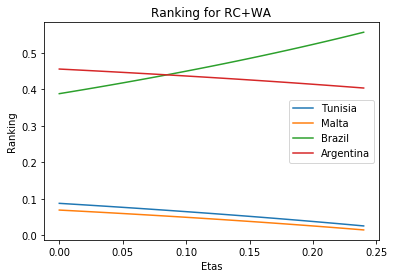

In [5]:
for i in range(n_choices):
    plt.plot(etas,rankings_RC_WA[:,i], label=labels[i])
plt.legend()
plt.title('Ranking for RC+WA')
plt.xlabel('Etas')
plt.ylabel('Ranking')

Text(0, 0.5, 'Ranking')

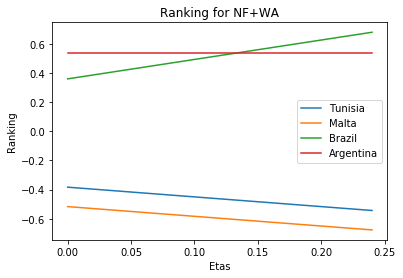

In [6]:
for i in range(n_choices):
    plt.plot(etas,rankings_NF_WA[:,i], label=labels[i])
plt.legend()
plt.title('Ranking for NF+WA')
plt.xlabel('Etas')
plt.ylabel('Ranking')